## Lab - EDA Univariate Analysis: Diving into Amazon UK Product Insights

**Objective**: Explore the product listing dynamics on Amazon UK to extract actionable business insights. By understanding the distribution, central tendencies, and relationships of various product attributes, businesses can make more informed decisions on product positioning, pricing strategies, and inventory management.

**Dataset**: This lab utilizes the [Amazon UK product dataset](https://www.kaggle.com/datasets/asaniczka/uk-optimal-product-price-prediction/)
which provides information on product categories, brands, prices, ratings, and more from from Amazon UK. You'll need to download it to start working with it.



### Part 1: Understanding Product Categories

**Business Question**: What are the most popular product categories on Amazon UK, and how do they compare in terms of listing frequency?

1. **Frequency Tables**:
    - Generate a frequency table for the product `category`.
    - Which are the top 5 most listed product categories?

2. **Visualizations**:
    - Display the distribution of products across different categories using a bar chart. *If you face problems understanding the chart, do it for a subset of top categories.*
    - For a subset of top categories, visualize their proportions using a pie chart. Does any category dominate the listings?

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

In [2]:
df = pd.read_csv('amz_uk_price_prediction_dataset.csv')

In [5]:
df.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [45]:
#1Frequency Tables:
    #Generate a frequency table for the product `category`. Which are the top 5 most listed product categories?
#Top 5 most listed product categories are: sports and outdoors, beauty, handmade clothing (shoes and accessories), bath & body, birthday gifts
df['category'].value_counts().head(5)

Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
Name: category, dtype: int64

<AxesSubplot:>

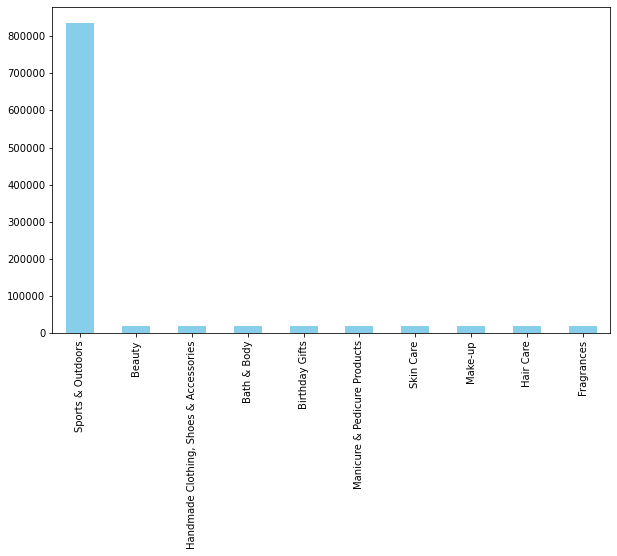

In [30]:
#2. Visualizations:
    # Display the distribution of products across different categories using a bar chart. *If you face problems understanding the chart, 
        #do it for a subset of top categories.*
top_10_categories=df['category'].value_counts().head(10)
top_10_categories.plot(kind='bar', figsize=(10,6), color='skyblue')

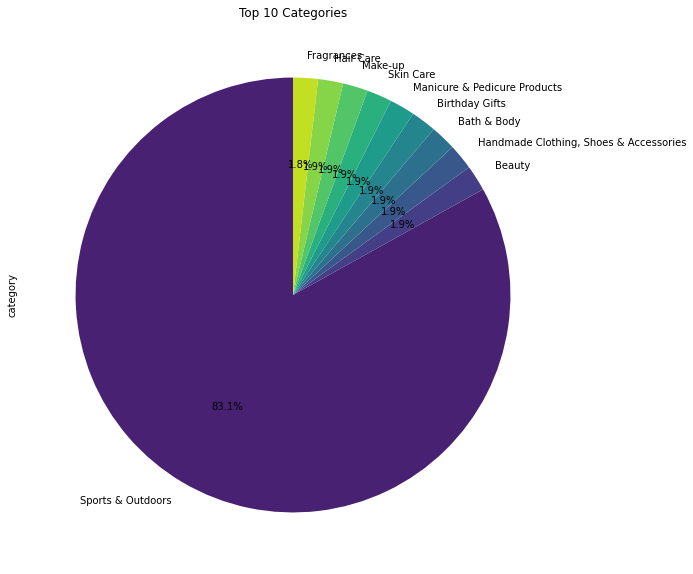

In [40]:
# For a subset of top categories, visualize their proportions using a pie chart. Does any category dominate the listings?
# The sports & outdoors category dominates by an overwhelming majority

fig, ax = plt.subplots(figsize=(10, 10))
fig.patch.set_facecolor('white')
top_10_categories.plot(
    kind='pie', startangle=90,
    colors=sns.color_palette("viridis", n_colors=10), 
    autopct ='%1.1f%%',
    figsize=(10,10))

plt.title('Top 10 Categories')
plt.show()
    



### Part 2: Delving into Product Pricing

**Business Question**: How are products priced on Amazon UK, and are there specific price points or ranges that are more common?

1. **Measures of Centrality**:
    - Calculate the mean, median, and mode for the `price` of products.
    - What's the average price point of products listed? How does this compare with the most common price point (mode)?

2. **Measures of Dispersion**:
    - Determine the variance, standard deviation, range, and interquartile range for product `price`.
    - How varied are the product prices? Are there any indicators of a significant spread in prices?

3. **Visualizations**:
    - Is there a specific price range where most products fall? Plot a histogram to visualize the distribution of product prices. *If its hard to read these diagrams, think why this is, and explain how it could be solved.*.
    - Are there products that are priced significantly higher than the rest? Use a box plot to showcase the spread and potential outliers in product pricing. 

In [57]:

#1. #Measures of Centrality:
    #Calculate the mean, median, and mode for the `price` of products.
    #What's the average price point of products listed? How does this compare with the most common price point (mode)?
df['price'].describe().round(2)
#mean = 89 
#median = 19
#mode = 9.99
#the average price point is 89, while the mode 9.99(10)
print(df['price'].median())
print(df['price'].mode())

19.09
0    9.99
Name: price, dtype: float64


In [68]:
#2. **Measures of Dispersion**:
    #Determine the variance, standard deviation, range, and interquartile range for product `price`.
    #How varied are the product prices? Are there any indicators of a significant spread in prices?
df['price'].var()
# variance = 119,445
#standard deviation is 345.61
#range is 100,000 
# #IQR is 45 - 9.99 = 36, 
#The product prices are quite varied as suggested by variance and the range

price_range = df['price'].max() - df['price'].min()
print(price_range)
#print(df['price'].describe().round(2))
df['price'].describe().round(2)

100000.0


count    2443651.00
mean          89.24
std          345.61
min            0.00
25%            9.99
50%           19.09
75%           45.99
max       100000.00
Name: price, dtype: float64

In [ ]:
#3. Visualizations:
    #Is there a specific price range where most products fall? Plot a histogram to visualize the distribution of product prices. 
    # If its hard to read these diagrams, think why this is, and explain how it could be solved.*.
    #Are there products that are priced significantl y higher than the rest? Use a box plot to showcase the spread and
    # potential outliers in product pricing. 

<AxesSubplot:xlabel='price', ylabel='Count'>

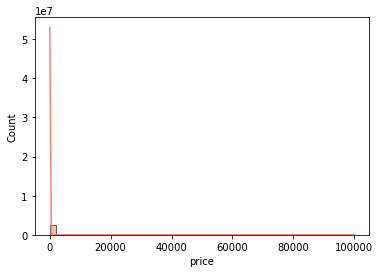

In [72]:
sns.histplot(df['price'], kde=True, bins=50, color="salmon")
#the diagram is hard to read because of the outliers, it could be solved if the outlier was eliminated

<AxesSubplot:>

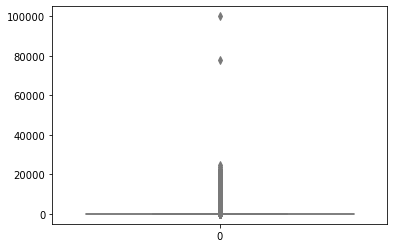

In [74]:
sns.boxplot(data = df['price'], color="lightblue")

In [84]:
iqr = np.percentile(df['price'],25) - np.percentile(df['price'],25)
lower_limit = np.percentile(df['price'],25) - 1.5*iqr
print(lower_limit)


9.99


In [97]:
Q1 = np.percentile(df['price'], 25)
Q3 = np.percentile(df['price'], 75)
IQR = Q3 - Q1
upper_limit = Q3 + 1.5 * IQR
print(upper_limit)
print(IQR)

99.99000000000001
36.0


In [94]:
price_clean = df[df['price'] < upper_limit]

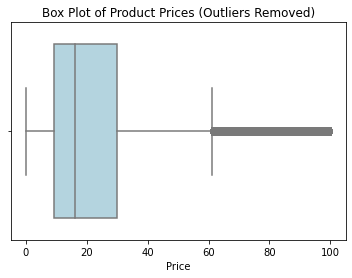

In [96]:
sns.boxplot(x=price_clean['price'], color="lightblue")
plt.title('Box Plot of Product Prices (Outliers Removed)')
plt.xlabel('Price')
plt.show()

<AxesSubplot:xlabel='price', ylabel='Count'>

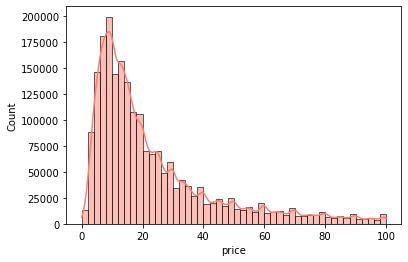

In [98]:
sns.histplot(x=price_clean['price'], kde=True, bins=50, color="salmon")
#most prices are around $10



### Part 3: Unpacking Product Ratings

**Business Question**: How do customers rate products on Amazon UK, and are there any patterns or tendencies in the ratings?

1. **Measures of Centrality**:
    - Calculate the mean, median, and mode for the `rating` of products.
    - How do customers generally rate products? Is there a common trend?

2. **Measures of Dispersion**:
    - Determine the variance, standard deviation, and interquartile range for product `rating`.
    - Are the ratings consistent, or is there a wide variation in customer feedback?

3. **Shape of the Distribution**:
    - Calculate the skewness and kurtosis for the `rating` column. 
    - Are the ratings normally distributed, or do they lean towards higher or lower values?

4. **Visualizations**:
    - Plot a histogram to visualize the distribution of product ratings. Is there a specific rating that is more common?

---

**Submission**: Submit a Jupyter Notebook which contains code and a business-centric report summarizing your findings. 



In [100]:
df.columns

Index(['uid', 'asin', 'title', 'stars', 'reviews', 'price', 'isBestSeller',
       'boughtInLastMonth', 'category'],
      dtype='object')

In [117]:

#1. **Measures of Centrality**:
    # Calculate the mean, median, and mode for the `rating` of products.
    # How do customers generally rate products? Is there a common trend?
print(df['stars'].mean())
print(df['stars'].median())
print(df['stars'].mode())

#most customers dont rate the products 

2.152836472966905
0.0
0    0.0
Name: stars, dtype: float64


In [120]:

#2. **Measures of Dispersion**:
    # Determine the variance, standard deviation, and interquartile range for product `rating`.
    # Are the ratings consistent, or is there a wide variation in customer feedback?
print(df['stars'].var())
print(df['stars'].std())
Q1 = np.percentile(df['stars'], 25)
Q3 = np.percentile(df['stars'], 75)
upper_limit = Q3 + 1.5 * IQR
lower_limit = Q1 - 1.5 * IQR
IQR = Q3 - Q1
print(IQR)
print(upper_limit)
print(lower_limit)

#low Variance and Standard Deviation: These indicate that there is a significant variation in the number of reviews
#  with some products having very high review counts, contributing to a wide spread in the data.

4.81743402976196
2.1948653785054697
4.4
11.0
-6.6000000000000005


In [121]:
#3. **Shape of the Distribution**:
 #   - Calculate the skewness and kurtosis for the `rating` column. 
  #  - Are the ratings normally distributed, or do they lean towards higher or lower values?
skewness_reviews = df['stars'].skew()
kurtosis_reviews = df['stars'].kurtosis()
print(skewness_reviews)
print(kurtosis_reviews)

#the skewness is 0.08, close to 0, which suggests that it is fairly symmetrical
#there is a negative kurtosis which indicates that the distribution is flatter

0.08120735761080985
-1.9260061280432985


<AxesSubplot:xlabel='stars', ylabel='Count'>

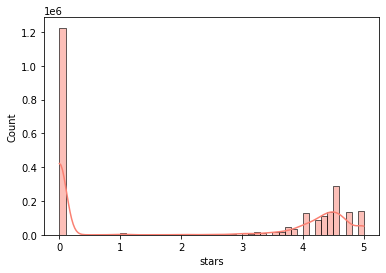

In [123]:

#4. **Visualizations**:
    # Plot a histogram to visualize the distribution of product ratings. Is there a specific rating that is more common? 
    #most common rating is 4.5 stars
sns.histplot(data=df['stars'], kde=True, bins=50, color="salmon")
